In [ ]:
#Bespoke dashboard for personal portfolio analysis





#5 main components of the dashboard
#Overview, Portfolio Allocation, Performance (Risk and Return), Forecasting, Tools
#Overview: Total Value, Net to Value, Expected Loss, Value at Risk, ROI, Sharpe Ratio, Volatility
#Portfolio Allocation: Pie chart of asset allocation, Table of asset allocation, Graph of asset allocation and capital growth
#Performance: Graph of portfolio value, Graph of portfolio returns, Graph of portfolio volatility and Sharpe ratio
#Forecasting: Graph of portfolio value forecast, Graph of portfolio returns forecast, Graph of portfolio volatility forecast
#Tools: MACD, RSI, Bollinger Bands, Moving Averages, Stochastic Oscillator - Graphs of each superimposed on portfolio value

#Data for the dashboard




#Value at risk, Expected Loss, Net to Value

<Response [200]>
{'error': [], 'result': {'SOLGBP': [[1725296340, '100.30', '100.30', '100.29', '100.29', '100.29', '0.36000000', 2], [1725296400, '100.29', '100.29', '100.29', '100.29', '0.00', '0.00000000', 0], [1725296460, '100.29', '100.29', '100.29', '100.29', '0.00', '0.00000000', 0], [1725296520, '100.29', '100.29', '100.29', '100.29', '0.00', '0.00000000', 0], [1725296580, '100.79', '100.80', '100.72', '100.80', '100.75', '14.10868755', 7], [1725296640, '100.80', '100.80', '100.80', '100.80', '0.00', '0.00000000', 0], [1725296700, '100.69', '100.69', '100.69', '100.69', '100.69', '0.98175016', 1], [1725296760, '100.69', '100.69', '100.69', '100.69', '100.69', '4.93097626', 1], [1725296820, '100.69', '100.69', '100.69', '100.69', '0.00', '0.00000000', 0], [1725296880, '100.62', '100.62', '100.62', '100.62', '100.62', '0.08629890', 1], [1725296940, '100.62', '100.62', '100.62', '100.62', '0.00', '0.00000000', 0], [1725297000, '100.62', '100.62', '100.62', '100.62', '0.00', '0.000

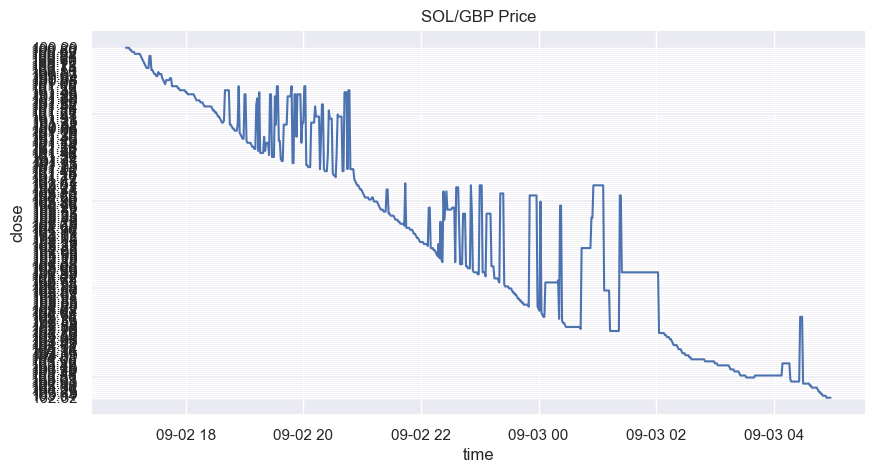

                   time    open    high     low   close    vwap       volume  \
0   2024-09-02 16:59:00  100.30  100.30  100.29  100.29  100.29   0.36000000   
1   2024-09-02 17:00:00  100.29  100.29  100.29  100.29    0.00   0.00000000   
2   2024-09-02 17:01:00  100.29  100.29  100.29  100.29    0.00   0.00000000   
3   2024-09-02 17:02:00  100.29  100.29  100.29  100.29    0.00   0.00000000   
4   2024-09-02 17:03:00  100.79  100.80  100.72  100.80  100.75  14.10868755   
..                  ...     ...     ...     ...     ...     ...          ...   
715 2024-09-03 04:54:00  102.82  102.82  102.82  102.82  102.82   0.50000000   
716 2024-09-03 04:55:00  102.82  102.82  102.82  102.82    0.00   0.00000000   
717 2024-09-03 04:56:00  102.82  102.82  102.82  102.82    0.00   0.00000000   
718 2024-09-03 04:57:00  102.82  102.82  102.82  102.82    0.00   0.00000000   
719 2024-09-03 04:58:00  102.82  102.82  102.82  102.82    0.00   0.00000000   

     count  
0        2  
1        0  


{'error': ['EAPI:Invalid key']}

In [1]:
import requests
import pandas as pd
import plotly.graph_objs as go
import pytz
import seaborn as sns
import matplotlib.pyplot as plt
import config as cfg
import json

# Function to fetch OHLC data from Kraken API
def fetch_kraken_ohlc(pair, interval=1):
    url = f"https://api.kraken.com/0/public/OHLC?pair={pair}&interval={interval}"
    response = requests.get(url)
    print(response)
    data = response.json()
    print(data)
    
    if 'result' in data:
        key = list(data['result'].keys())[0]
        df = pd.DataFrame(data['result'][key], columns=[
            'time', 'open', 'high', 'low', 'close', 'vwap', 'volume', 'count'])
        df['time'] = pd.to_datetime(df['time'], unit='s')
        return df
    else:
        print(f"Error fetching data for {pair}: {data.get('error', 'Unknown error')}")
        return None

# Fetch data for SOL/GBP and mSOL/USD pairs
solgbp_data = fetch_kraken_ohlc('SOLGBP')

# Plot the data as pie chart
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 5))
sns.lineplot(data=solgbp_data, x='time', y='close')
plt.title('SOL/GBP Price')
plt.show()

# Setup query keys
api_key = cfg.api_key_query
api_priv = cfg.api_priv_query

print(solgbp_data)

import urllib.parse
import hashlib
import hmac
import base64

def get_kraken_signature(urlpath, data, secret):
    if isinstance(data, str):
        encoded = (str(json.loads(data)["nonce"]) + data).encode()
    else:
        encoded = (str(data["nonce"]) + urllib.parse.urlencode(data)).encode()
    message = urlpath.encode() + hashlib.sha256(encoded).digest()

    mac = hmac.new(base64.b64decode(secret), message, hashlib.sha512)
    sigdigest = base64.b64encode(mac.digest())
    return sigdigest.decode()

def get_account_balance(urlpath, payload, api_key, api_priv, headers=None):
    url2 = urlpath
    print(url2)
    payloaded = json.dumps(payload)
    signature = get_kraken_signature(url2, payloaded, api_priv)
    print("API-Sign: {}".format(signature))

    # Fetch Account Balance info
    url = "https://api.kraken.com/0/private/Balance"

    payload = json.dumps({
        "nonce": 1695828436
    })

    if headers is None:
        headers = {
            'Content-Type': 'application/json',
            'Accept': 'application/json',
            'API-Key': api_key,
            'API-Sign': signature
        }

    response = requests.request("POST", url, headers=headers, data=payload)

    print(response.text)
    print(response.json())
    return response.json()

# Corrected function call
get_account_balance("https://api.kraken.com/0/private/Balance", {
    "nonce": 1695828436
}, api_key, api_priv)

In [ ]:
import requests
import json

url = "https://api.kraken.com/0/private/Balance"

payload = json.dumps({
  "nonce": 1695828436
})
headers = {
  'Content-Type': 'application/json',
  'Accept': 'application/json',
  'API-Key': 'R9dH3rU6UWnWS9bVtB3556z4qRh9BpovtLZYs99Qk7SHFRyTKFAFfZg3',
  'API-Sign': 'i62r4xixWNRYAxdMD9x+ecDSsTpxMX6/GHnop2vnUiWQxGF8dfrM7cIA1Aj5EoCy7E/dbW4X1caRGZ2K2KQ9Jg=='
}

response = requests.request("POST", url, headers=headers, data=payload)

print(response.text)

In [ ]:
# #Example Dashboard for Stock Price Analysis using Yahoo Finance API
# #interactive dashboard using dash and plotly
# import dash
# from dash import dcc
# from dash import html
# import plotly.graph_objs as go
# import pandas as pd
# import numpy as np
# from datetime import datetime as dt, timedelta as td

# # Initialize the Dash app
# app = dash.Dash(__name__)

# # Define the layout of the dashboard
# app.layout = html.Div([
#    html.H1("Custom Trading Dashboard"),  # Title of the dashboard
#    dcc.Dropdown(
#        id='stock-dropdown',
#        options=[
#            {'label': 'Apple', 'value': 'AAPL'},
#            {'label': 'Google', 'value': 'GOOGL'},
#            {'label': 'Amazon', 'value': 'AMZN'}
#        ],
#        value='AAPL'  # Default selected value
#    ),
#    dcc.Graph(id='price-chart')  # Placeholder for the price chart
# ])

# # Run the app
# if __name__ == '__main__':
#    app.run_server(debug=True)

# import yfinance as yf
# import pandas as pd

# # Fetch historical market data
# def fetch_data(ticker):
#    stock = yf.Ticker(ticker)
#    hist = stock.history(period="1y")  # Retrieve data for the past year
#    return hist

# import plotly.graph_objs as go

# def create_price_chart(df):
#    fig = go.Figure()
#    fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close Price'))
#    fig.update_layout(title='Stock Price Over Time', xaxis_title='Date', yaxis_title='Price')
#    return fig



# from dash.dependencies import Input, Output

# @app.callback(
#    Output('price-chart', 'figure'),
#    [Input('stock-dropdown', 'value')]
# )
# def update_price_chart(ticker):
#    df = fetch_data(ticker)
#    fig = create_price_chart(df)
#    return fig


# def add_moving_average(df, window):
#    df[f'MA{window}'] = df['Close'].rolling(window=window).mean()
#    return df

# def create_price_chart_with_ma(df):
#    fig = go.Figure()
#    fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close Price'))
#    fig.add_trace(go.Scatter(x=df.index, y=df[f'MA50'], mode='lines', name='50-Day MA'))
#    fig.update_layout(title='Stock Price with Moving Average', xaxis_title='Date', yaxis_title='Price')
#    return fig
# '''
# @app.callback(
#    Output('price-chart', 'figure'),
#    [Input('stock-dropdown', 'value')]
# )
# def update_price_chart(ticker):
#    df = fetch_data(ticker)
#    df = add_moving_average(df, 50)
#    fig = create_price_chart_with_ma(df)
#    return fig   
# '''


In [ ]:
import config as cfg

import streamlit as st
import streamlit.components.v1 as components
import requests
import urllib.parse
import hashlib
import hmac
import base64
import time
import plotly.graph_objects as go
import pandas as pd

# Set page configuration
st.set_page_config(
    page_title="Kraken Portfolio",
    page_icon="💰",
)

# Read the README file
with open('README.md', 'r') as file:
    readme_text = file.read()

# Read Kraken API key and secret stored in environment variables
api_url = "https://api.kraken.com"
api_key = cfg.api_key
api_priv = cfg.api_priv

# Function to get Kraken signature
def get_kraken_signature(urlpath, data, secret):
    postdata = urllib.parse.urlencode(data)
    encoded = (str(data['nonce']) + postdata).encode()
    message = urlpath.encode() + hashlib.sha256(encoded).digest()

    mac = hmac.new(base64.b64decode(secret), message, hashlib.sha512)
    sigdigest = base64.b64encode(mac.digest())
    return sigdigest.decode()

# Function to make Kraken API request
def kraken_request(uri_path, data, api_key, api_sec):
    headers = {}
    headers['API-Key'] = api_key
    headers['API-Sign'] = get_kraken_signature(uri_path, data, api_sec)
    req = requests.post((api_url + uri_path), headers=headers, data=data)
    return req

if __name__ == "__main__":
    st.title("Kraken Portfolio App 💰")
    st.write("Below is an app to view my Kraken Portfolio. Expand the Expanders below for Documentation, Kraken Holdings, and Backend in Supabase")
    st.write("")
    # Show the README content
    readme_expander = st.expander("README Documentation 📓")
    with readme_expander:
        st.balloons()
        st.markdown(readme_text)


    '''
    # Construct the Kraken API request and get the balances
    resp = kraken_request('/0/private/Balance', {
        "nonce": str(int(1000*time.time()))
    }, api_key, api_sec)

    # Convert the response JSON to a Python dictionary
    data = resp.json()

    # Get the balances from the 'result' field in the response
    balances = data['result']

    # Read coin types from CSV file
    coin_types_df = pd.read_csv('kraken_lookup.csv')

    # Merge coin types with balances data
    merged_data = pd.merge(pd.DataFrame(balances.items(), columns=['kraken_name', 'Balance']), coin_types_df, on='kraken_name', how='left')

    st.write("")

    # Fetch price data from Kraken API for all coins
    coin_names = merged_data['kraken_name'].tolist()
    coin_prices = {}

    for coin in coin_names:
        if coin != 'ZUSD':  # Exclude fiat
            pair = coin + 'USD'
            price_response = requests.get(f'https://api.kraken.com/0/public/Ticker?pair={pair}')
            price_data = price_response.json()
            if 'result' in price_data and pair in price_data['result']:
                coin_prices[coin] = float(price_data['result'][pair]['a'][0])

    # Fetch USD to GBP exchange rate
    exchange_rate_response = requests.get('https://api.exchangerate-api.com/v4/latest/USD')
    exchange_rate_data = exchange_rate_response.json()
    usd_to_gbp = exchange_rate_data['rates']['GBP']

    # Create a dictionary to store balances by type
    type_balances = {}
    for _, row in merged_data.iterrows():
        coin_type = row['type'] if not pd.isnull(row['type']) else 'Unknown'  # Use 'Unknown' for missing types
        if coin_type not in type_balances:
            type_balances[coin_type] = 0
        balance_in_usd = float(row['Balance']) * coin_prices.get(row['kraken_name'], 0)  # Convert to USD
        balance_in_gbp = balance_in_usd * usd_to_gbp  # Convert to GBP
        type_balances[coin_type] += balance_in_gbp

    # Create labels and values for the pie chart
    labels = list(type_balances.keys())
    values = list(type_balances.values())

    # Create an interactive pie chart using Plotly
    fig = go.Figure(data=go.Pie(labels=labels, values=values))
    fig.update_layout(title='Portfolio Breakdown by Coin Type (GBP)')
    # Show the portfolio content
    portfolio_expander = st.expander("Portfolio Breakdown by Coin Type 📈 ")
    with portfolio_expander:
        st.snow()
        st.plotly_chart(fig)
    # Show the supabase content
    supabase_expander = st.expander("Supabase Backend 🚄 ")
    with supabase_expander:
        st.balloons()
        st.write("kraken table hosted in Supabase 📝")
        st.dataframe(coin_types_df)
    # Show the author content
    author_expander = st.expander("Author's Gthub Projects 🌏")
    with author_expander:
        url = "https://raw.githubusercontent.com/mattmajestic/mattmajestic/main/README.md"
        response = requests.get(url)
        readme_content = response.text if response.status_code == 200 else ""
        iframe_html = f'<iframe srcdoc="{readme_content}</iframe>'
        st.markdown(iframe_html, unsafe_allow_html=True)

    # Show the BTC Pay Server
    btc_expander = st.expander("Donate BTC 💸")
    with btc_expander:
        url = "https://mainnet.demo.btcpayserver.org/api/v1/invoices?storeId=4r8DKKKMkxGPVKcW9TXB2eta7PTVzzs192TWM3KuY52e&price=100&currency=USD&defaultPaymentMethod=BTC"
        link='Pay wit BTC [via this link](https://mainnet.demo.btcpayserver.org/api/v1/invoices?storeId=4r8DKKKMkxGPVKcW9TXB2eta7PTVzzs192TWM3KuY52e&price=100&currency=USD&defaultPaymentMethod=BTC)'
        st.markdown(link,unsafe_allow_html=True)
        components.iframe(url,width = 300,height = 500, scrolling=True)
'''

In [ ]:
# import requests
# import json

# url = "https://api.kraken.com/0/private/BalanceEx"

# payload = json.dumps({
#   "nonce": 1695828436
# })
# headers = {
#   'Content-Type': 'application/json',
#   'Accept': 'application/json',
#   'API-Key': 'jUctxyUKBrXM4MqGIbhtjLGZVG0zs3pJSmdX7IDZRF44SmUZwVGr+MY4',
#   'API-Sign': 'FIZ/RPuw4ZCDujZ7m8G0Ige+WwfUyGxTSchO73goSmPtIe4ZSABakZpFQy3VTLpqKqo5aaqXyaQmi+5jymk26A=='
# }

# response = requests.request("POST", url, headers=headers, data=payload)

# print(response.text)

In [ ]:

import config as cfg

import streamlit as st
import streamlit.components.v1 as components
import requests
import urllib.parse
import hashlib
import hmac
import base64
import time
import plotly.graph_objects as go
import pandas as pd

# Set page configuration
st.set_page_config(
    page_title="Kraken Portfolio",
    page_icon="💰",
)

# Read the README file
with open('README.md', 'r') as file:
    readme_text = file.read()

# Read Kraken API key and secret stored in environment variables
api_url = "https://api.kraken.com"
api_key = cfg.api_key
api_priv = cfg.api_priv

# Function to get Kraken signature
def get_kraken_signature(urlpath, data, secret):
    postdata = urllib.parse.urlencode(data)
    encoded = (str(data['nonce']) + postdata).encode()
    message = urlpath.encode() + hashlib.sha256(encoded).digest()

    mac = hmac.new(base64.b64decode(secret), message, hashlib.sha512)
    sigdigest = base64.b64encode(mac.digest())
    return sigdigest.decode()

# Function to make Kraken API request
def kraken_request(uri_path, data, api_key, api_sec):
    headers = {}
    headers['API-Key'] = api_key
    headers['API-Sign'] = get_kraken_signature(uri_path, data, api_sec)
    req = requests.post((api_url + uri_path), headers=headers, data=data)
    return req

if __name__ == "__main__":
    st.title("Kraken Portfolio App 💰")
    st.write("Below is an app to view my Kraken Portfolio. Expand the Expanders below for Documentation, Kraken Holdings, and Backend in Supabase")
    st.write("")
    # Show the README content
    readme_expander = st.expander("README Documentation 📓")
    with readme_expander:
        st.balloons()
        st.markdown(readme_text)


    '''
    # Construct the Kraken API request and get the balances
    resp = kraken_request('/0/private/Balance', {
        "nonce": str(int(1000*time.time()))
    }, api_key, api_sec)

    # Convert the response JSON to a Python dictionary
    data = resp.json()

    # Get the balances from the 'result' field in the response
    balances = data['result']

    # Read coin types from CSV file
    coin_types_df = pd.read_csv('kraken_lookup.csv')

    # Merge coin types with balances data
    merged_data = pd.merge(pd.DataFrame(balances.items(), columns=['kraken_name', 'Balance']), coin_types_df, on='kraken_name', how='left')

    st.write("")

    # Fetch price data from Kraken API for all coins
    coin_names = merged_data['kraken_name'].tolist()
    coin_prices = {}

    for coin in coin_names:
        if coin != 'ZUSD':  # Exclude fiat
            pair = coin + 'USD'
            price_response = requests.get(f'https://api.kraken.com/0/public/Ticker?pair={pair}')
            price_data = price_response.json()
            if 'result' in price_data and pair in price_data['result']:
                coin_prices[coin] = float(price_data['result'][pair]['a'][0])

    # Fetch USD to GBP exchange rate
    exchange_rate_response = requests.get('https://api.exchangerate-api.com/v4/latest/USD')
    exchange_rate_data = exchange_rate_response.json()
    usd_to_gbp = exchange_rate_data['rates']['GBP']

    # Create a dictionary to store balances by type
    type_balances = {}
    for _, row in merged_data.iterrows():
        coin_type = row['type'] if not pd.isnull(row['type']) else 'Unknown'  # Use 'Unknown' for missing types
        if coin_type not in type_balances:
            type_balances[coin_type] = 0
        balance_in_usd = float(row['Balance']) * coin_prices.get(row['kraken_name'], 0)  # Convert to USD
        balance_in_gbp = balance_in_usd * usd_to_gbp  # Convert to GBP
        type_balances[coin_type] += balance_in_gbp

    # Create labels and values for the pie chart
    labels = list(type_balances.keys())
    values = list(type_balances.values())

    # Create an interactive pie chart using Plotly
    fig = go.Figure(data=go.Pie(labels=labels, values=values))
    fig.update_layout(title='Portfolio Breakdown by Coin Type (GBP)')
    # Show the portfolio content
    portfolio_expander = st.expander("Portfolio Breakdown by Coin Type 📈 ")
    with portfolio_expander:
        st.snow()
        st.plotly_chart(fig)
    # Show the supabase content
    supabase_expander = st.expander("Supabase Backend 🚄 ")
    with supabase_expander:
        st.balloons()
        st.write("kraken table hosted in Supabase 📝")
        st.dataframe(coin_types_df)
    # Show the author content
    author_expander = st.expander("Author's Gthub Projects 🌏")
    with author_expander:
        url = "https://raw.githubusercontent.com/mattmajestic/mattmajestic/main/README.md"
        response = requests.get(url)
        readme_content = response.text if response.status_code == 200 else ""
        iframe_html = f'<iframe srcdoc="{readme_content}</iframe>'
        st.markdown(iframe_html, unsafe_allow_html=True)

    # Show the BTC Pay Server
    btc_expander = st.expander("Donate BTC 💸")
    with btc_expander:
        url = "https://mainnet.demo.btcpayserver.org/api/v1/invoices?storeId=4r8DKKKMkxGPVKcW9TXB2eta7PTVzzs192TWM3KuY52e&price=100&currency=USD&defaultPaymentMethod=BTC"
        link='Pay wit BTC [via this link](https://mainnet.demo.btcpayserver.org/api/v1/invoices?storeId=4r8DKKKMkxGPVKcW9TXB2eta7PTVzzs192TWM3KuY52e&price=100&currency=USD&defaultPaymentMethod=BTC)'
        st.markdown(link,unsafe_allow_html=True)
        components.iframe(url,width = 300,height = 500, scrolling=True)
'''

In [1]:
import config as cfg
import streamlit as st
import streamlit.components.v1 as components
from streamlit_option_menu import option_menu
import requests
import urllib.parse
import hashlib
import hmac
import base64
import time
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

# Set page configuration
st.set_page_config(
    page_title="Portfolio Dashboard",
    page_icon="📊",
)

# selected = option_menu(
#             menu_title= None,  # required
#             options=["Overview", "Performance", "Tools"],  # required
#             icons=["person-workspace", "bullseye","tools"],  # optional
#             default_index=0,  # optional
#             orientation="horizontal",
#             styles={
#                 "container": {"padding": "0!important", "background-color": "#4c6081"},
#                 "icon": {"color": "black", "font-size": "16px"},
#                 "nav-link": {a
#                     "font-size": "16px",
#                     "text-align": "center",
#                     "margin": "0px",
#                     "--hover-color": "#eee",
#                 },
#                 "nav-link-selected": {"color" : "black", "background-color": "#ffffff"},
#             },
#         )
#selected = streamlit_menu(example=EXAMPLE_NO)

# Read the README file
readmePath = 'ML\PortfolioDashboard\Readme.md'
with open('Readme.md' , 'r') as file:
    readme_text = file.read()

# Read Kraken API key and secret stored in config file
api_url = "https://api.kraken.com/0/"

api_key = cfg.api_key
api_sec = cfg.api_priv

# Create dictionary to map API endpoints to their respective names and respective request types
api_endpoints = {
    'Assets': '/public/Assets',
    'AssetPairs': '/public/AssetPairs',
    'Ticker': '/public/Ticker',
    'OHLC': '/public/OHLC',

    'Balance': '/private/Balance',
    'ExtendedBalance': '/private/BalanceEx',
    'Ledgers': '/private/Ledgers',
    'QueryLedgers': '/private/QueryLedgers',
    'TradeVolume': '/private/TradeVolume',
}

# Function to generate a nonce
def generate_nonce():
    return str(int(1000 * time.time()))

# Function to get Kraken signature
def get_kraken_signature(urlpath, data, secret):
    postdata = urllib.parse.urlencode(data)
    encoded = (str(data['nonce']) + postdata).encode()
    message = urlpath.encode() + hashlib.sha256(encoded).digest()

    mac = hmac.new(base64.b64decode(secret), message, hashlib.sha512)
    sigdigest = base64.b64encode(mac.digest())
    return sigdigest.decode() 

# Function to make Kraken API request
def kraken_request(uri_path, data, api_key, api_sec, headers=None):
    if headers is None:
        headers = {}

    headers['API-Key'] = api_key
    headers['API-Sign'] = get_kraken_signature(uri_path, data, api_sec)
    req = requests.post((api_url + uri_path), headers=headers, data=data)
    return req

#Function to make more non-trivial Kraken API get request
def kraken_get_request(uri_path, data=None, headers=None):
    if headers is None:
        headers = {
            'Accept': 'application/json'
        }
    
    headers.update(headers)
    req = requests.get((api_url + uri_path), headers=headers, data=data)
    return req

# Function to get the altnames of all tradeable Kraken asset pairs
def grab_all_assets():
    # Construct the Kraken API request and get all asset pairs from the Kraken API
    assetPairs = kraken_get_request(api_endpoints['AssetPairs']).json()['result']
    
    # Extract 'altname' for each asset pair
    altNames = [details['altname'] for details in assetPairs.values()]
    return altNames

# Function to get the balance of all assets in the Kraken account with the given API keys
def grab_ext_bal():
    # Construct the Kraken API request and get the External Balance Information
    resp = kraken_request(api_endpoints['ExtendedBalance'], {"nonce": generate_nonce(),}, api_key, api_sec).json()['result']
    
    balanceDict = {}
    # Extract the balance of each non zero asset
    for asset in resp:
        if float(resp[asset]['result']) == 0:
            continue
        balance = resp[asset]['balance']
        balanceDict[asset] = balance

    return balanceDict

assetPairs = grab_all_assets()
balanceDict = grab_ext_bal()

# Initialize subplots
fig = go.Figure()

# Add a trace for each asset in the balance dictionary
for asset in balanceDict:
    fig.add_trace(go.Bar(x=[asset], y=[balanceDict[asset]], name=asset))

# Update the layout of the figure
fig.update_layout(
    title="Portfolio Overview",
    xaxis_title="Asset",
    yaxis_title="Balance",
    barmode='stack'
)

# Display the figure
st.plotly_chart(fig)

# Pie chart of the portfolio using seaborn
sns.set_theme(style="darkgrid")
sns.set_palette("pastel")

#Extract labels and values
labels = list(balanceDict.keys())
values = list(balanceDict.values())

fig = plt.figure(figsize=(16, 16), dpi=1600)

# Initialize 9 subplots 3x3
fig, ax = plt.subplots(3, 3 , figsize=(12, 12), dpi=1600)
# Plot pie chart

ax[1,1].pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Asset Distribution')
plt.show()



2024-09-01 16:44:48.512 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-01 16:44:52.283 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


KeyError: 'result'